# GDELT Data with relationship index

- GDELT event records are stored in an expanded version of the dyadic CAMEO format,capturing two actors and the action performed by Actor1 upon Actor2.
- GDELT uses CAMEO event taxonomy, which is a collection of more than 300 types of events organized into a hierarchical taxonomy and recorded in the files as a numeric code.
- GDELT uses PETRARCH2 with a Stanford coreNLP parser for cameo coding. A detailed description of PETRARCH2 can be found at the following URL:https://buildmedia.readthedocs.org/media/pdf/petrarch/latest/petrarch.pdf


- https://github.com/abresler/gdeltr2


### GDELT URL

- GDELT data site: http://gdeltproject.org/data.html
- Additional explanation about GDLET 1: http://data.gdeltproject.org/documentation/ISA.2013.GDELT.pdf

- GDELT Code Book: http://data.gdeltproject.org/documentation/GDELT-Data_Format_Codebook.pdf
- CAMEO Code Book: http://data.gdeltproject.org/documentation/CAMEO.Manual.1.1b3.pdf

#### additional notice

- using google big query: https://bcho.tistory.com/1116

## Using gdeltPyR

- I used gdeltPyR to use gdelt data.
- pypi.org: https://pypi.org/project/gdelt/
- github : https://github.com/linwoodc3/gdeltPyR

In [1]:
## package import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdelt
import os
import datetime
from time import gmtime, strftime
from dateutil.parser import parse

import matplotlib.pyplot as plt
# ipynb 내부에서 matplotlib를 잘 보이게 하려면 필요한 명령어이다.
%matplotlib inline


## Download GDELT 1.0


In [2]:
# setting a date range
cur_date = datetime.datetime(2018,1,1)
end_date = datetime.datetime(2019,10,22)

In [3]:
gd = gdelt.gdelt(version=2)
results = gd.Search(['%s %s %s'%('2018', "01", '01')],table='gkg',coverage=True, translation=False)

KeyboardInterrupt: 

In [4]:
## setting download GDELT version
gd = gdelt.gdelt(version=2)

os.makedirs('D:/Gdelt/mention2',exist_ok=True)

while cur_date < end_date:
    print("%s-%s-%s"%(cur_date.year, cur_date.month, cur_date.day))
    if not os.path.exists("D:/Gdelt/mention2/%s-%s-%s.pkl"%(cur_date.year, cur_date.month, cur_date.day)):

        year = cur_date.year
        month = str(cur_date.month)
        day = str(cur_date.day)
    
        if cur_date.month < 10:
          month = "0"+month
        if cur_date.day < 10:
          day = "0"+day

        results = gd.Search(['%s %s %s'%(year, month, day)],table='mentions',coverage=True, translation=False)
        results.to_pickle("D:/Gdelt/mention2/%s-%s-%smention2.pkl"%(cur_date.year, cur_date.month, cur_date.day))

    cur_date+=datetime.timedelta(days=1)

2018-1-1
2018-1-2
2018-1-3
2018-1-4
2018-1-5
2018-1-6
2018-1-7
2018-1-8
2018-1-9
2018-1-10
2018-1-11
2018-1-12
2018-1-13
2018-1-14
2018-1-15
2018-1-16
2018-1-17
2018-1-18
2018-1-19
2018-1-20
2018-1-21
2018-1-22
2018-1-23
2018-1-24
2018-1-25
2018-1-26
2018-1-27
2018-1-28
2018-1-29
2018-1-30
2018-1-31
2018-2-1
2018-2-2
2018-2-3
2018-2-4
2018-2-5
2018-2-6
2018-2-7
2018-2-8
2018-2-9
2018-2-10
2018-2-11
2018-2-12
2018-2-13
2018-2-14
2018-2-15
2018-2-16
2018-2-17
2018-2-18
2018-2-19
2018-2-20
2018-2-21
2018-2-22
2018-2-23
2018-2-24
2018-2-25
2018-2-26
2018-2-27
2018-2-28
2018-3-1
2018-3-2
2018-3-3
2018-3-4
2018-3-5
2018-3-6
2018-3-7
2018-3-8
2018-3-9
2018-3-10
2018-3-11
2018-3-12
2018-3-13
2018-3-14
2018-3-15
2018-3-16
2018-3-17
2018-3-18
2018-3-19
2018-3-20
2018-3-21
2018-3-22
2018-3-23
2018-3-24
2018-3-25
2018-3-26
2018-3-27
2018-3-28
2018-3-29
2018-3-30
2018-3-31
2018-4-1
2018-4-2
2018-4-3
2018-4-4
2018-4-5
2018-4-6
2018-4-7
2018-4-8
2018-4-9
2018-4-10
2018-4-11
2018-4-12
2018-4-13
2018-4

KeyboardInterrupt: 

## loading data

- We created a df to represent the time series of changes in North American relations for 2019.

In [2]:
## view all pandas elements
def print_full(x):
    pd.set_option('display.max_columns', 100)
    print(x)
    pd.reset_option('display.max_columns')

In [19]:
dft = pd.DataFrame()  
k = os.listdir("D:/Gdelt/mention2")
JPKR2018 = pd.read_csv('C:/Users/Juwon Oh/Documents/github/GDELT/JPKR2019raw2.csv')
GLOBALEVENTID = JPKR2018['GLOBALEVENTID'].tolist() 

In [4]:
## selecting actor

#mySources = ["nytimes.com", "washingtonpost.com", "foxnews.com", "cnn.com"]
actor1 = ["KOR", "JPN"]
actor2 = ["KOR", "JPN"]

In [ ]:
## select colum

for i in k:
    print(i)
    if i.endswith(".pkl"):
        tmp = pd.read_pickle("D:/Gdelt/mention2/2019/"+i)
        tmp = tmp[tmp["GLOBALEVENTID"].apply(lambda x: x in GLOBALEVENTID)]
        #tmp = tmp[tmp["Actor1Code"].apply(lambda x: x in actor1)]
        #tmp = tmp[tmp["Actor2Code"].apply(lambda x: x in actor2)]
        #tmp = tmp[['GLOBALEVENTID','SQLDATE','Actor1Code','Actor1CountryCode',
         #          'Actor2Code', 'Actor2Name', 'Actor2CountryCode',
          #         'IsRootEvent', 'EventCode', 'CAMEOCodeDescription', 'EventBaseCode', 'EventRootCode', 'QuadClass',
           #        'GoldsteinScale','NumMentions','NumArticles','AvgTone', 'AvgTone', 'SOURCEURL']]
        dft = pd.concat([dft, tmp], sort=False) 
        #dft = dft.loc[dft['Actor1Code'] != dft['Actor2Code']]
        #tmp1 = tmp[tmp["SOURCES"].apply(lambda x: x in mySources)]

2019-1-1mention2.pkl
2019-1-2mention2.pkl
2019-1-3mention2.pkl
2019-1-4mention2.pkl
2019-1-5mention2.pkl
2019-1-6mention2.pkl
2019-1-7mention2.pkl
2019-1-8mention2.pkl
2019-1-9mention2.pkl
2019-1-10mention2.pkl
2019-1-11mention2.pkl
2019-1-12mention2.pkl
2019-1-13mention2.pkl
2019-1-14mention2.pkl
2019-1-15mention2.pkl
2019-1-16mention2.pkl
2019-1-17mention2.pkl
2019-1-18mention2.pkl
2019-1-19mention2.pkl
2019-1-20mention2.pkl
2019-1-21mention2.pkl
2019-1-22mention2.pkl
2019-1-23mention2.pkl
2019-1-24mention2.pkl
2019-1-25mention2.pkl
2019-1-26mention2.pkl
2019-1-27mention2.pkl
2019-1-28mention2.pkl
2019-1-29mention2.pkl
2019-1-30mention2.pkl
2019-1-31mention2.pkl
2019-2-1mention2.pkl
2019-2-2mention2.pkl
2019-2-3mention2.pkl
2019-2-4mention2.pkl
2019-2-5mention2.pkl
2019-2-6mention2.pkl
2019-2-7mention2.pkl
2019-2-8mention2.pkl
2019-2-9mention2.pkl
2019-2-10mention2.pkl
2019-2-11mention2.pkl
2019-2-12mention2.pkl
2019-2-13mention2.pkl
2019-2-14mention2.pkl
2019-2-15mention2.pkl
2019-2

In [29]:
dft


,GLOBALEVENTID,EventTimeDate,MentionTimeDate,MentionType,MentionSourceName,MentionIdentifier,SentenceID,Actor1CharOffset,Actor2CharOffset,ActionCharOffset,InRawText,Confidence,MentionDocLen,MentionDocTone,MentionDocTranslationInfo,Extras
12072,813262547,20181231010000,20181231010000,1,thesungazette.com,http://www.thesungazette.com/article/news/2018...,38,10266,10280,10288,1,100,12379,-6.291391,NaN,NaN
23794,813259952,20181231004500,20181231004500,1,defence.pk,https://defence.pk/pdf/threads/japan-demotes-k...,24,7149,7199,7192,0,20,7265,-2.168257,NaN,NaN
23795,813259953,20181231004500,20181231004500,1,defence.pk,https://defence.pk/pdf/threads/japan-demotes-k...,24,7149,7185,7178,1,80,7265,-2.168257,NaN,NaN
96549,812088353,20181224003000,20181231080000,1,koreatimes.co.kr,http://www.koreatimes.co.kr/www/nation/2018/12...,11,2163,2153,2192,1,60,2669,-4.566210,NaN,NaN
96550,812088353,20181224003000,20181231080000,1,koreatimes.co.kr,http://www.koreatimes.co.kr/www/nation/2018/12...,11,2163,2153,2192,1,60,2669,-4.566210,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111783,813166553,20181230090000,20181230091500,1,koreatimes.co.kr,http://www.koreatimes.co.kr/www/nation/2018/12...,1,272,408,334,0,40,3378,-6.043956,NaN,NaN
116806,813166552,20181230090000,20181230094500,1,koreatimes.co.kr,http://www.koreatimes.co.kr/www/nation/2018/12...,1,272,375,318,1,60,3385,-6.215722,NaN,NaN
116807,813166553,20181230090000,20181230094500,1,koreatimes.co.kr,http://www.koreatimes.co.kr/www/nation/2018/12...,1,272,408,334,0,40,3385,-6.215722,NaN,NaN
186193,813166552,20181230090000,20181230160000,1,koreatimes.co.kr,http://koreatimes.co.kr/www/nation/2018/12/205...,1,272,375,318,1,60,3385,-6.215722,NaN,NaN


In [30]:
JPKR2018

,Unnamed: 0,GLOBALEVENTID,SQLDATE,Actor1Code,Actor1Name,Actor1CountryCode,Actor1Type1Code,Actor2Code,Actor2Name,Actor2CountryCode,...,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumArticles,AvgTone,AvgTone.1,SOURCEURL
0,2181,813259952,2018-12-31,JPN,TOKYO,JPN,NaN,KOR,SEOUL,KOR,...,"Threaten, not specified below",130,13,3,-4.4,2,2,-2.168257,-2.168257,https://defence.pk/pdf/threads/japan-demotes-k...
1,2182,813259953,2018-12-31,JPN,TOKYO,JPN,NaN,KOR,SEOUL,KOR,...,"Threaten, not specified below",130,13,3,-4.4,8,8,-2.168257,-2.168257,https://defence.pk/pdf/threads/japan-demotes-k...
2,9536,813262547,2018-12-31,MNCJPN,HONDA,JPN,MNC,MNCKOR,HYUNDAI,KOR,...,"Use conventional military force, not specifie...",190,19,4,-10.0,10,10,-6.291391,-6.291391,http://www.thesungazette.com/article/news/2018...
3,34394,813302259,2018-12-31,JPN,JAPANESE,JPN,NaN,KOR,SOUTH KOREAN,KOR,...,"Demand, not specified below",100,10,3,-5.0,2,2,-3.921569,-3.921569,http://www.koreatimes.co.kr/www/nation/2018/12...
4,34395,813302260,2018-12-31,JPN,JAPAN,JPN,NaN,KOR,SOUTH KOREA,KOR,...,"Accuse, not specified below",112,11,3,-2.0,1,1,-3.921569,-3.921569,http://www.koreatimes.co.kr/www/nation/2018/12...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12346,34764,813166552,2018-12-23,JPN,JAPAN,JPN,NaN,KORMIL,SOUTH KOREAN,KOR,...,"Return, release, not specified below",84,8,2,7.0,6,6,-6.043956,-6.043956,http://www.koreatimes.co.kr/www/nation/2018/12...
12347,34765,813166553,2018-12-23,JPN,JAPAN,JPN,NaN,KORMIL,SOUTH KOREA,KOR,...,"Return, release, not specified below",84,8,2,7.0,4,4,-6.043956,-6.043956,http://www.koreatimes.co.kr/www/nation/2018/12...
12348,34766,813166554,2018-12-23,JPNGOVMIL,JAPAN,JPN,GOV,KOR,SOUTH KOREAN,KOR,...,"Return, release, not specified below",84,8,2,7.0,2,2,-6.081081,-6.081081,http://www.koreatimes.co.kr/www/nation/2018/12...
12349,35349,813167137,2018-12-30,JPN,JAPANESE,JPN,NaN,KOR,SOUTH KOREA,KOR,...,Make pessimistic comment,12,1,1,-0.4,2,2,-6.081081,-6.081081,http://www.koreatimes.co.kr/www/nation/2018/12...


In [6]:
dft['SQLDATE']= pd.to_datetime(dft['SQLDATE'], format='%Y%m%d', errors='ignore')

KeyError: 'SQLDATE'

In [23]:
dft.tail(n=5)

,GLOBALEVENTID,SQLDATE,Actor1Code,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumArticles,AvgTone,AvgTone,SOURCEURL
150216,881285778,2019-10-21,JPNGOV,JPN,KOR,SOUTH KOREAN,KOR,0,042,Make a visit,042,04,1,1.9,4,4,2.230483,2.230483,http://www.arirang.com/News/News_View.asp?nseq...
150217,881285779,2019-10-21,JPNGOV,JPN,KORGOV,SOUTH KOREAN,KOR,0,042,Make a visit,042,04,1,1.9,6,6,2.230483,2.230483,http://www.arirang.com/News/News_View.asp?nseq...
150260,881285822,2019-10-21,KOR,KOR,JPNGOV,JAPAN,JPN,0,043,Host a visit,043,04,1,2.8,4,4,2.230483,2.230483,http://www.arirang.com/News/News_View.asp?nseq...
150261,881285823,2019-10-21,KORGOV,KOR,JPNGOV,JAPAN,JPN,0,043,Host a visit,043,04,1,2.8,6,6,2.230483,2.230483,http://www.arirang.com/News/News_View.asp?nseq...
153313,881289897,2019-10-21,KOR,KOR,JPN,JAPAN,JPN,0,036,Express intent to meet or negotiate,036,03,1,4.0,4,4,5.882353,5.882353,https://www.nerdwallet.com/blog/travel/4-of-th...


In [38]:
fulldf.columns

Index(['GLOBALEVENTID', 'EventTimeDate', 'MentionTimeDate', 'MentionType',
       'MentionSourceName', 'MentionIdentifier', 'SentenceID',
       'Actor1CharOffset', 'Actor2CharOffset', 'ActionCharOffset', 'InRawText',
       'Confidence', 'MentionDocLen', 'MentionDocTone',
       'MentionDocTranslationInfo', 'Extras', 'Unnamed: 0', 'SQLDATE',
       'Actor1Code', 'Actor1Name', 'Actor1CountryCode', 'Actor1Type1Code',
       'Actor2Code', 'Actor2Name', 'Actor2CountryCode', 'Actor2Type1Code',
       'IsRootEvent', 'EventCode', 'CAMEOCodeDescription', 'EventBaseCode',
       'EventRootCode', 'QuadClass', 'GoldsteinScale', 'NumMentions',
       'NumArticles', 'AvgTone', 'AvgTone.1', 'SOURCEURL'],
      dtype='object')

In [42]:
fulldf = pd.merge(dft,JPKR2018, on='GLOBALEVENTID', how='left')

fulldf.to_csv("D:/Gdelt/mention2/2018/JPKR2018mentionall2_1.csv", mode='w')

In [36]:
fulldf.dropna

<bound method DataFrame.dropna of        GLOBALEVENTID   EventTimeDate  MentionTimeDate  MentionType  \
0          813262547  20181231010000   20181231010000            1   
1          813259952  20181231004500   20181231004500            1   
2          813259953  20181231004500   20181231004500            1   
3          812088353  20181224003000   20181231080000            1   
4          812088353  20181224003000   20181231080000            1   
...              ...             ...              ...          ...   
50419      813166553  20181230090000   20181230091500            1   
50420      813166552  20181230090000   20181230094500            1   
50421      813166553  20181230090000   20181230094500            1   
50422      813166552  20181230090000   20181230160000            1   
50423      813166553  20181230090000   20181230160000            1   

       MentionSourceName                                  MentionIdentifier  \
0      thesungazette.com  http://www.thesungaz

## Let's divide it according to whether actor1 is North Korea or the United States.

In [25]:
KRJP = dft[dft["Actor1CountryCode"].apply(lambda x: x in 'KOR')]
JPKR = dft[dft["Actor1CountryCode"].apply(lambda x: x in 'JPN')]

In [26]:
KRJP.to_csv("KRJP2019raw2.csv", mode='w')
JPKR.to_csv("JPKR2019raw2.csv", mode='w')

In [20]:
USNK_week

NameError: name 'USNK_week' is not defined

## weekly time series and visualization

- We see weekly 'GoldsteinScale','NumMentions','NumArticles','AvgTone'.
- Therefore, the data represented by the numerical figures are arranged over time.

In [28]:
## daily information
#dft.set_index('SQLDATE', inplace=True)
## select goldstein index and avg tone
df_date = dft[['GoldsteinScale','NumMentions','NumArticles','AvgTone']]
df_week = df_date.resample(rule='W').mean()["2018-01-01":]


In [29]:
df_week

,GoldsteinScale,NumMentions,NumArticles,AvgTone,AvgTone
SQLDATE,,,,,
2018-01-07,1.860123,7.837423,7.702454,-1.948731,-1.948731
2018-01-14,2.178503,9.945578,9.808163,-0.828754,-0.828754
2018-01-21,0.732277,10.366337,10.306931,-2.007326,-2.007326
2018-01-28,1.900000,9.160465,9.141860,-1.204029,-1.204029
2018-02-04,1.840390,11.729805,11.729805,-0.766194,-0.766194
2018-02-11,1.905344,5.835878,5.832061,-0.595844,-0.595844
2018-02-18,0.594198,5.457338,5.457338,-0.943727,-0.943727
2018-02-25,0.615094,11.597484,11.550314,-2.310239,-2.310239
2018-03-04,1.366726,20.118068,19.960644,-1.504020,-1.504020


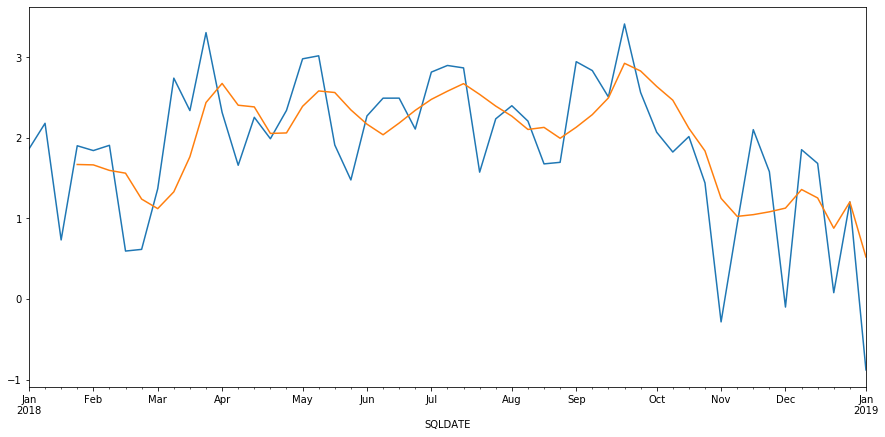

In [30]:
## weekly goldstein plot and mothly moving average plot
df_week['GoldsteinScale'].plot()
df_week.rolling(window=4).mean()['GoldsteinScale'].plot(figsize=(15,7))

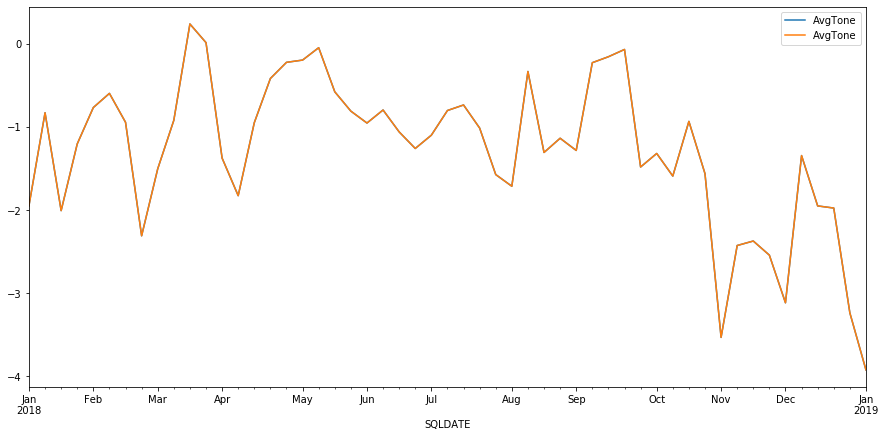

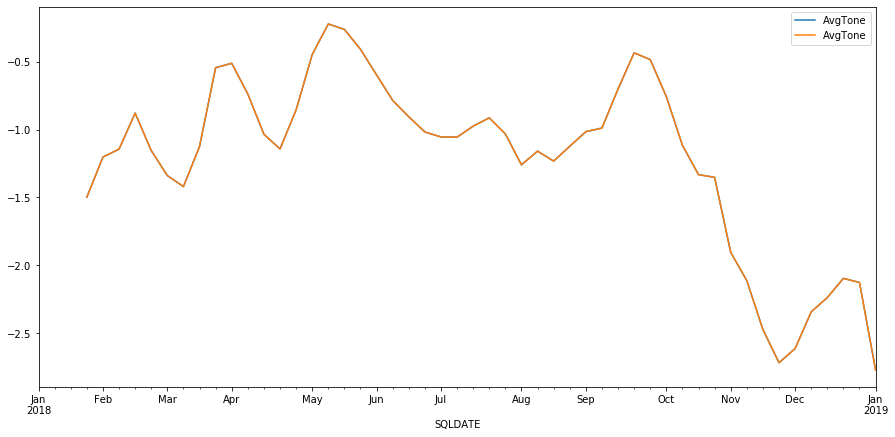

In [31]:
df_week['AvgTone'].plot(figsize=(15,7))
df_week.rolling(window=4).mean()['AvgTone'].plot(figsize=(15,7))

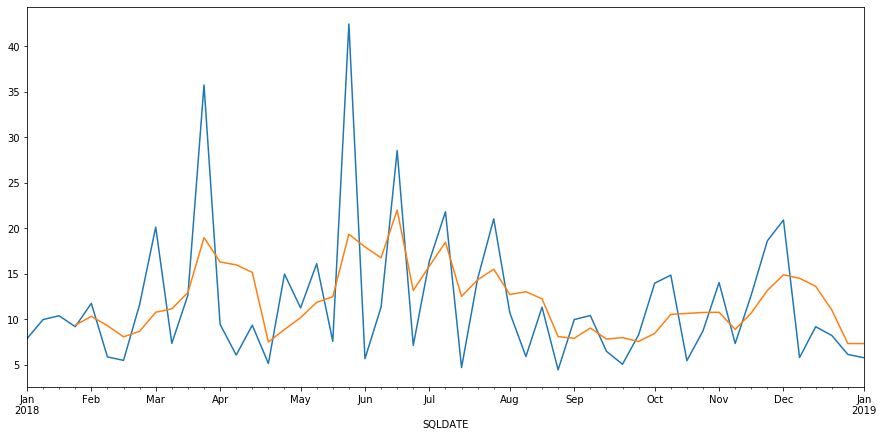

In [32]:
## weekly mention plot and mothly moving average plot
df_week['NumMentions'].plot()
df_week.rolling(window=4).mean()['NumMentions'].plot(figsize=(15,7))

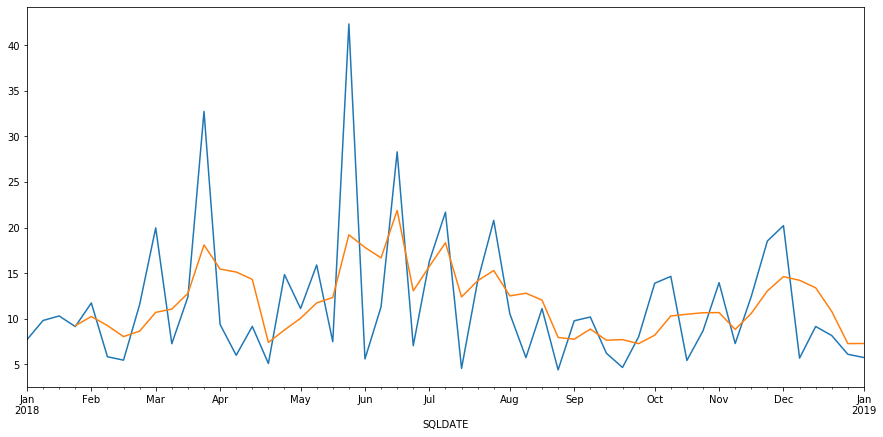

In [33]:

df_week['NumArticles'].plot()
df_week.rolling(window=4).mean()['NumArticles'].plot(figsize=(15,7))


## 국가별 시각화


In [47]:
JPKR2018 = pd.read_csv('data/JPKR2018raw.csv')  
JPKR2019 = pd.read_csv('data/JPKR2019raw.csv')  
JPKR = pd.concat([JPKR2018, JPKR2017], sort=False)
KRJP2018 = pd.read_csv('data/KRJP2018raw.csv')  
KRJP2019 = pd.read_csv('data/KRJP2019raw.csv') 
KRJP = pd.concat([JPKR2018, JPKR2019], sort=False)

In [77]:
KRJP

,SQLDATE,GLOBALEVENTID,Actor1Code,Actor1CountryCode,Actor2Code,Actor2Name,Actor2CountryCode,IsRootEvent,EventCode,CAMEOCodeDescription,EventBaseCode,EventRootCode,QuadClass,GoldsteinScale,NumMentions,NumArticles,AvgTone,AvgTone.1,SOURCEURL,Unnamed: 0
0,2018-12-31,813259952,JPN,JPN,KOR,SEOUL,KOR,0,130,"Threaten, not specified below",130,13,3,-4.4,2,2,-2.168257,-2.168257,https://defence.pk/pdf/threads/japan-demotes-k...,NaN
1,2018-12-31,813259953,JPN,JPN,KOR,SEOUL,KOR,0,130,"Threaten, not specified below",130,13,3,-4.4,8,8,-2.168257,-2.168257,https://defence.pk/pdf/threads/japan-demotes-k...,NaN
2,2018-12-31,813262547,MNCJPN,JPN,MNCKOR,HYUNDAI,KOR,0,190,"Use conventional military force, not specifie...",190,19,4,-10.0,10,10,-6.291391,-6.291391,http://www.thesungazette.com/article/news/2018...,NaN
3,2018-12-31,813302259,JPN,JPN,KOR,SOUTH KOREAN,KOR,0,100,"Demand, not specified below",100,10,3,-5.0,8,8,-3.840171,-3.840171,http://www.koreatimes.co.kr/www/nation/2018/12...,NaN
4,2018-12-31,813302260,JPN,JPN,KOR,SOUTH KOREA,KOR,0,112,"Accuse, not specified below",112,11,3,-2.0,4,4,-3.840171,-3.840171,http://www.koreatimes.co.kr/www/nation/2018/12...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15688,2019-10-19,880827312,JPN,JPN,KOR,SOUTH KOREA,KOR,0,163,Halt negotiations,163,16,4,-8.0,4,4,1.834862,1.834862,https://www.saigoneer.com/saigon-news/17639-un...,55230.0
15689,2019-10-19,880827313,JPN,JPN,KOR,SOUTH KOREA,KOR,0,163,Halt negotiations,163,16,4,-8.0,6,6,1.834862,1.834862,https://www.saigoneer.com/saigon-news/17639-un...,55231.0
15690,2019-10-19,880846897,JPN,JPN,KOR,SOUTH KOREA,KOR,1,36,Express intent to meet or negotiate,36,3,1,4.0,4,4,-2.881356,-2.881356,https://www.japantimes.co.jp/news/2019/10/19/n...,66443.0
15691,2019-10-19,880846898,JPN,JPN,KOR,SOUTH KOREA,KOR,1,36,Express intent to meet or negotiate,36,3,1,4.0,16,16,-2.881356,-2.881356,https://www.japantimes.co.jp/news/2019/10/19/n...,66444.0


In [64]:
JPKR.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15693 entries, 0 to 15692
Data columns (total 20 columns):
SQLDATE                 15693 non-null datetime64[ns]
GLOBALEVENTID           15693 non-null int64
Actor1Code              15693 non-null object
Actor1CountryCode       15693 non-null object
Actor2Code              15693 non-null object
Actor2Name              15693 non-null object
Actor2CountryCode       15693 non-null object
IsRootEvent             15693 non-null int64
EventCode               15693 non-null int64
CAMEOCodeDescription    15693 non-null object
EventBaseCode           15693 non-null int64
EventRootCode           15693 non-null int64
QuadClass               15693 non-null int64
GoldsteinScale          15693 non-null float64
NumMentions             15693 non-null int64
NumArticles             15693 non-null int64
AvgTone                 15693 non-null float64
AvgTone.1               15693 non-null float64
SOURCEURL               15693 non-null object
Unnamed: 0    

In [63]:
KRJP.dropna(axis=0).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15693 entries, 0 to 15692
Data columns (total 20 columns):
SQLDATE                 15693 non-null datetime64[ns]
GLOBALEVENTID           15693 non-null int64
Actor1Code              15693 non-null object
Actor1CountryCode       15693 non-null object
Actor2Code              15693 non-null object
Actor2Name              15693 non-null object
Actor2CountryCode       15693 non-null object
IsRootEvent             15693 non-null int64
EventCode               15693 non-null int64
CAMEOCodeDescription    15693 non-null object
EventBaseCode           15693 non-null int64
EventRootCode           15693 non-null int64
QuadClass               15693 non-null int64
GoldsteinScale          15693 non-null float64
NumMentions             15693 non-null int64
NumArticles             15693 non-null int64
AvgTone                 15693 non-null float64
AvgTone.1               15693 non-null float64
SOURCEURL               15693 non-null object
Unnamed: 0    

In [78]:
JPKR['SQLDATE']= pd.to_datetime(JPKR['SQLDATE'], format='%Y-%m-%d', errors='ignore')
JPKR_date = JPKR[['SQLDATE', 'GoldsteinScale','NumMentions','NumArticles','AvgTone']]
JPKR_date.set_index('SQLDATE', inplace=True)
JPKR_week = JPKR_date.resample(rule='D').mean()["2018-10-01":"2018-12-31"]

In [81]:
JPKR_week

,GoldsteinScale,NumMentions,NumArticles,AvgTone
SQLDATE,,,,
2018-10-01,2.911111,4.833333,4.833333,-1.250757
2018-10-02,2.548000,10.960000,10.960000,-0.558818
2018-10-03,3.525000,11.977273,11.772727,-1.516454
2018-10-04,2.694737,4.824561,4.824561,-0.934996
2018-10-05,-0.953333,10.400000,10.400000,-2.306842
...,...,...,...,...
2018-12-27,4.550000,6.285714,6.285714,-3.762041
2018-12-28,2.100000,6.423077,6.423077,-3.369580
2018-12-29,2.955556,2.777778,2.777778,-1.513644


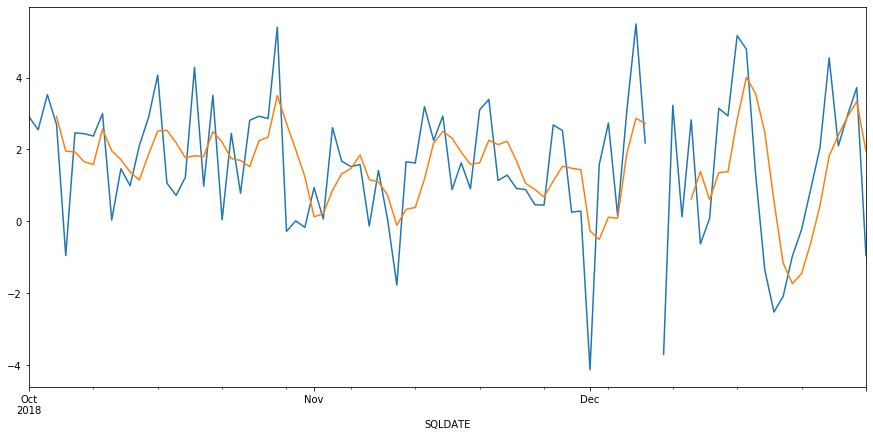

In [79]:
JPKR_week['GoldsteinScale'].plot()
JPKR_week.rolling(window=4).mean()['GoldsteinScale'].plot(figsize=(15,7))

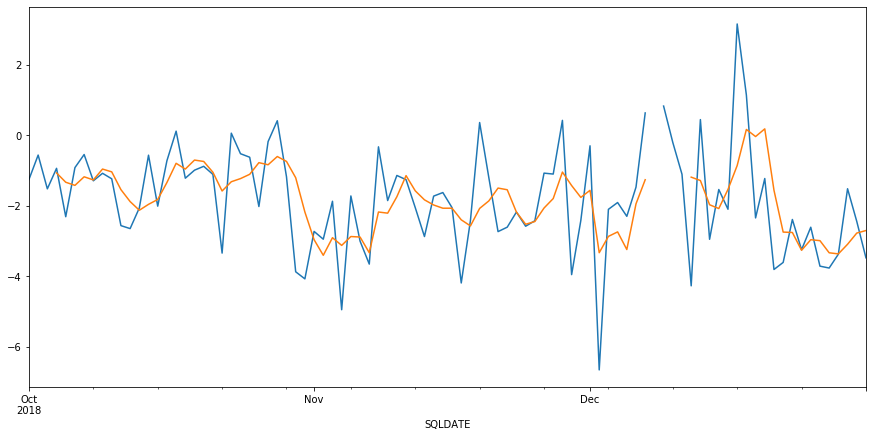

In [80]:

JPKR_week['AvgTone'].plot()
JPKR_week.rolling(window=4).mean()['AvgTone'].plot(figsize=(15,7))

In [70]:
KRJP['SQLDATE']= pd.to_datetime(KRJP['SQLDATE'], format='%Y-%m-%d', errors='ignore')
KRJP_date = KRJP[['SQLDATE', 'GoldsteinScale','NumMentions','NumArticles','AvgTone']]
KRJP_date.set_index('SQLDATE', inplace=True)
KRJP_week = KRJP_date.resample(rule='W').mean()["2018-01-01":]

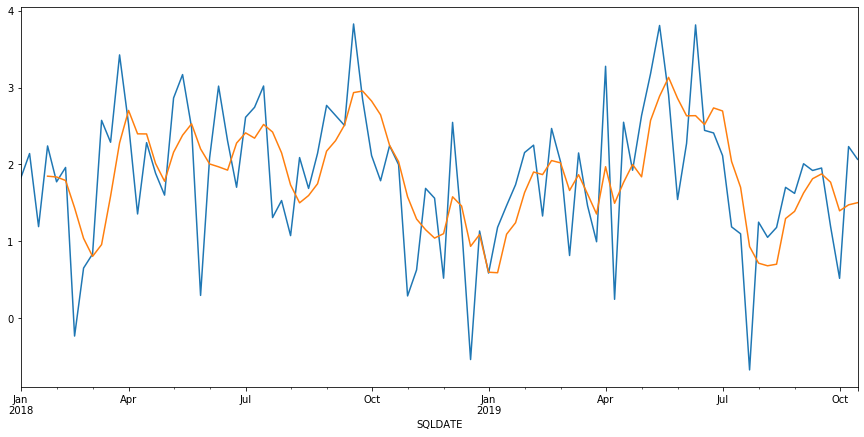

In [71]:
KRJP_week['GoldsteinScale'].plot()
KRJP_week.rolling(window=4).mean()['GoldsteinScale'].plot(figsize=(15,7))

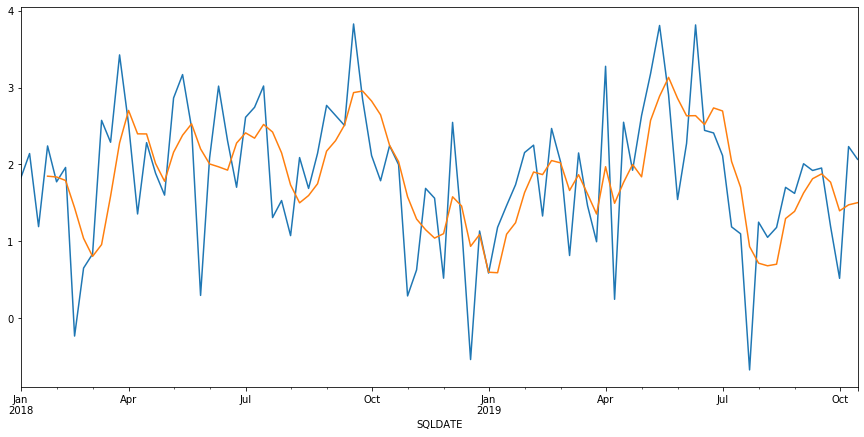

In [74]:
KRJP_week['GoldsteinScale'].plot()
KRJP_week.rolling(window=4).mean()['GoldsteinScale'].plot(figsize=(15,7))

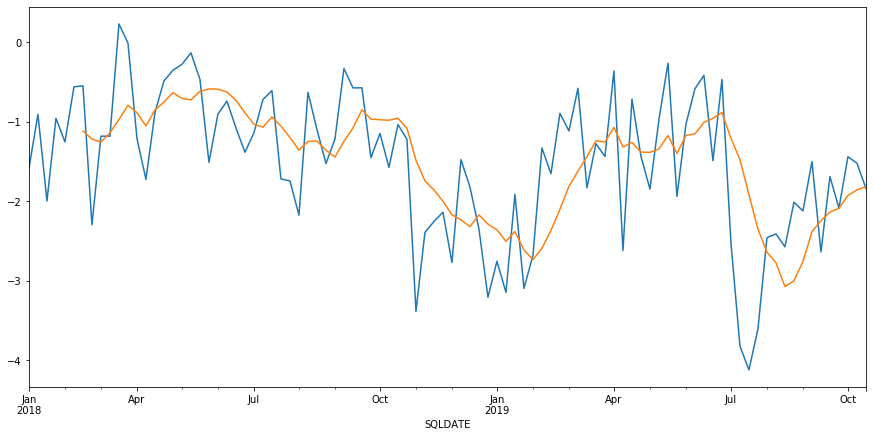

In [75]:
KRJP_week['AvgTone'].plot()
KRJP_week.rolling(window=30).mean()['AvgTone'].plot
KRJP_week.rolling(window=7).mean()['AvgTone'].plot(figsize=(15,7))

## 임시 북한

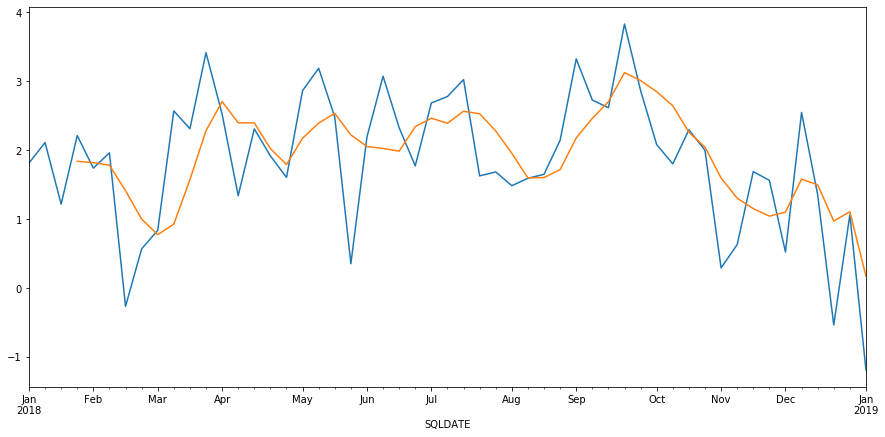

In [39]:
NKUS_date = JPKR[['GoldsteinScale','NumMentions','NumArticles','AvgTone']]
NKUS_week = NKUS_date["2018-01-01":].resample(rule='W').mean()
NKUS_week['GoldsteinScale'].plot()
NKUS_week.rolling(window=4).mean()['GoldsteinScale'].plot(figsize=(15,7))

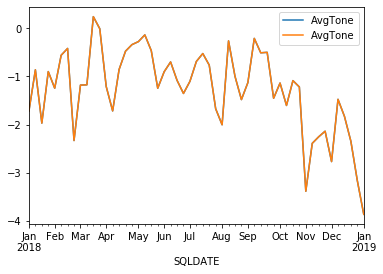

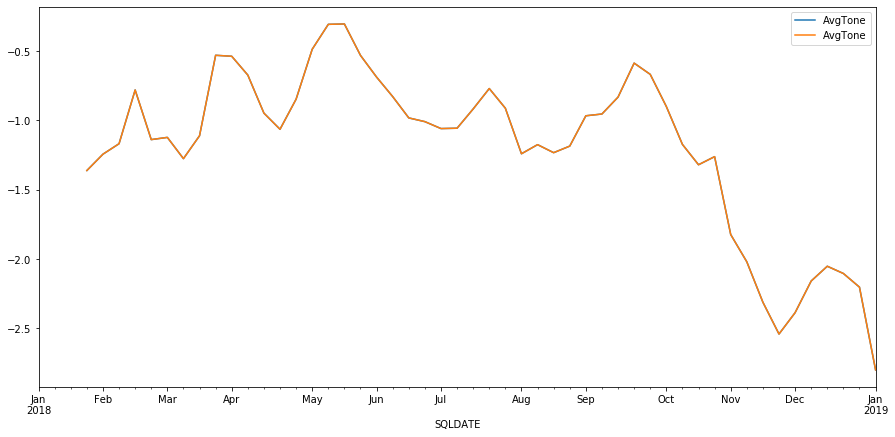

In [40]:
NKUS_week['AvgTone'].plot()
NKUS_week.rolling(window=4).mean()['AvgTone'].plot(figsize=(15,7))

## distribution of features


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
dft.info()

In [ ]:
sns.catplot(x="day", y="total_bill", data=dft)

In [ ]:
sns.distplot(x, kde=False, rug=True);

In [ ]:
sns.distplot(x, kde=False, rug=True);

In [ ]:
sns.distplot(x, kde=False, rug=True);

## forecast using arima and 

-
-

In [ ]:

# statsmodels는 paython에서 여러 통계모델을 제공하는 패키지이다.
from statsmodels.tsa.seasonal import seasonal_decompose
# addictive 모델은 observed = trend + seasonality + cyclical+residual로 측정한다.
result = seasonal_decompose(NKUS_week['AvgTone'], model='additive', freq=1)

In [ ]:
result.plot();# ;을 넣으면 그래프가 한 개만 나온다.
# 트렌드로만 모든 데이터가 설명된다. 

In [ ]:
# decompose한 결과를 잘 시각화하는 plot을 그려보자.
def plot_decompose(decomposeresult):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,8))
    decomposeresult.observed.plot(legend=False, ax=ax1)
    ax1.set_ylabel('observed')
    decomposeresult.trend.plot(legend=False, ax=ax2)
    ax2.set_ylabel('trend')
    decomposeresult.seasonal.plot(legend=False, ax=ax3)
    ax3.set_ylabel('seasonal')
    decomposeresult.resid.plot(legend=False, ax=ax4)
    ax4.set_ylabel('resid')

In [ ]:
plot_decompose(result)

In [ ]:
# multiplicative 모델은 observed = seasonality * trend * cyclical * residual로 측정한다. 
# 따라서 log(data)= seasonality + trend + cyclical + residual와 동일하다.

series = pd.Series([i**2 for i in range(1,100)])
result = seasonal_decompose(series, model='multiplicative', freq=1)
plot_decompose(result)

In [ ]:
## simple exponetial smoothing, holts, holts-winter`s model
from statsmodels.tsa.api import SimpleExpSmoothing